#Задача интерполяции
$$x_k = 1 + \frac{k}{n}$$
1. Построить полином Лагранжа y(x) = sin(x)
2. Построить $$P_n(x), y(x)$$
3. Построить $$P_n(x) - y(x)$$
4. Построить зависимость от n: $$\max|(P_{n}(x) - y(x))|$$

In [18]:
from math import *
import random
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative

In [19]:
def func1(x):
    return sin(x)

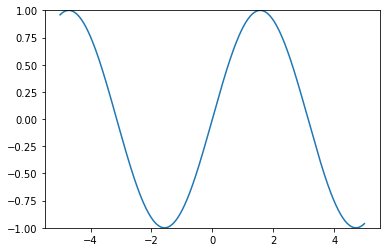

In [20]:
#y = sin(x), график
xmin = -5
xmax = 5
xlab = np.arange(xmin, xmax, 0.01)
ylab1 = np.array([func1(x) for x in xlab])
plt.plot(xlab, ylab1)
plt.ylim(-1,1)                                   
plt.show() 

In [21]:
def build_grid(a,b,n):
    return np.array([a + (b-a)*i/n for i in range(n + 1)])

In [22]:
def denominator_result(grid, i):
    result = 1
    for j in range(grid.shape[0]):
        if j != i:
            result *= grid[i] - grid[j];
    return result

In [23]:
def numerator_result(grid, i, x):
    result = 1
    for j in range(grid.shape[0]):
        if j != i:
            result *= x - grid[j]
    return result

In [24]:
def Lagrange_polynom_constants(grid, func):
    y = [sin(x) for x in grid]
    result = 0
    denominator = []
    numerator = []
    for i in range(grid.shape[0]):
        denominator.append(denominator_result(grid, i)) 
    return y, grid, denominator

In [25]:
def Get_Lagrange_value(y, grid, denominator, x):
    result = 0
    for i in range(len(y)):
        result += y[i]*numerator_result(grid, i, x)/denominator_result(grid,i)
    return result

In [26]:
def f(x):
    return sin(x)

(-2, 2)

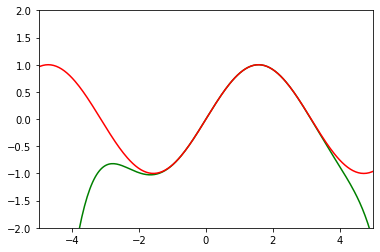

In [28]:
n = 7
a = 0
b = 2
N = 400
x = build_grid(a,b,n)
y, grid, denominator = Lagrange_polynom_constants(x, f)
x_plot = np.linspace(-8, 8,num = N)
y_plot = np.array([Get_Lagrange_value(y, grid, denominator, x_plot[i]) for i in range(N)])
plt.plot(x_plot, y_plot, color = 'green')
plt.plot(x_plot, np.array([sin(x) for x in x_plot]), color = 'red')
plt.xlim(-5,5)
plt.ylim(-2,2)

(-1e-06, 1e-06)

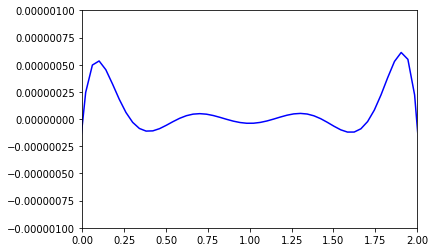

In [37]:
y_sin = np.array([sin(x) for x in x_plot])
plt.plot(x_plot, y_plot - y_sin, color = 'blue')
plt.xlim(0,2)
plt.ylim(-1e-6,1e-6)

In [31]:
def maxx(i, f, a, b):
    x = build_grid(a,b,i)
    y, grid, denominator = Lagrange_polynom_constants(x, f)
    x_plot = np.linspace(a, b, num = 200)
    y_plot = np.array([Get_Lagrange_value(y, grid, denominator, x_plot[i]) for i in range(200)])
    y_sin = np.array([sin(x) for x in x_plot])
    supremum = 0
    for i in range(200):
        if(abs(y_sin[i] - y_plot[i]) > supremum):
            supremum = abs(y_sin[i] - y_plot[i]) 
    return supremum

In [32]:
result = []
for i in range(1,51):
    result.append(maxx(i, f, a,b))

In [33]:
result = [log10(res) for res in result]

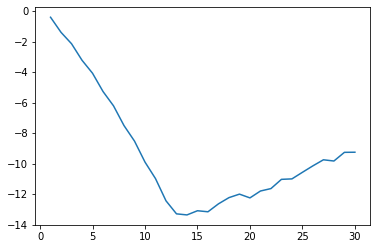

In [38]:
plt.plot(np.linspace(1,30,30), result[:30])